Intercept: 33.88310421876116
Slope: -0.9033640298075836


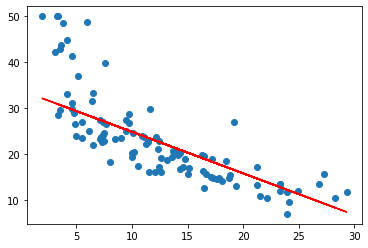

mse: 39.126, mae: 4.315
RMSE: 0.598


In [2]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 

names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data=pd.read_csv('boston.csv', names=names,skiprows=1)
data.head()

X=data.iloc[:,-2].values
Y=data.iloc[:,-1].values
# Razdelenie na testovyu i obuchenie
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

x_train= x_train.reshape(-1, 1)
y_train= y_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)
# Postroenie lineynoy regressii
regress= LinearRegression()
regress.fit(x_train,y_train)
print('Intercept:', regress.intercept_[0])
print('Slope:', regress.coef_[0][0])
y_pred = regress.predict(x_test)
# Ravel - для схлопывания вектора в массив
datas = pd.DataFrame({'values':x_test.ravel(), 'Actual': y_test, 'Predicted': y_pred.ravel()})
# Grafic
plt.scatter(datas['values'],datas['Actual'])
plt.plot(datas['values'],datas['Predicted'],color='red')
plt.show()
# eror
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print('mse: %.3f, mae: %.3f' % (mse, mae))

rmse=1-(mean_squared_error(y_test, y_pred)/np.var(y_test))
print('RMSE: %.3f' % (rmse))